In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from util import *

We use the subset of MNIST which uniformly sampling 1000 0s, 1s and 2s to demonstrate how to use functions in util.
First, import the data:

In [3]:
train = pd.read_csv('mnist_012_1000.csv', header=None)

In [4]:
idx = np.arange(1000)
Y = np.zeros((1000, 3, 1))
Y[idx, train.iloc[:,0].values, 0] = 1
X = train.iloc[:, 1:].values.astype('float32').reshape(-1,28,28)
X = X-X.mean(axis=0)
Y = Y-Y.mean(axis=0)

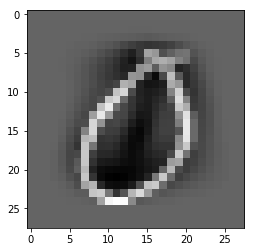

In [5]:
plt.imshow(X[0,:], cmap='gray')
plt.show()

Use 2DCCA to extract the first 2DCCA component. 

#### Parameters:
##### method: 'als' or 'pi'
##### updating_rule: 'exact' or 'inexact', where we implement SVRG for inexact update.
##### para=(M,m,eta): only use when updating_rule is 'inexact' and M is number of outer loop of SVRG, m is number of inner loop of SVRG and eta is the learning rate
##### iter_max: number of iterations

#### Outputs:
##### loading=(Lx, Rx, Ly, Ry): Lx, Rx, Ly, Ry are left and right CCA components of X and Y, respectively.
##### corr: array, shape (iter_max+1, ). The correlation of projected data in each iteration.
##### error: array, shape (iter_max+1, ). The change of loading in each iteration.

In [6]:
loading, corr, error = twoDcca(X, Y, method='als', updating_rule='exact', para=None, loading_init=None, x_regular=1e-4, y_regular=1e-4, iter_max=10)

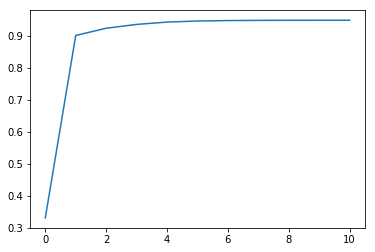

In [7]:
plt.plot(corr)

use effectiveInit to get the rank one approximation of first component of CCA and use loading_init to set the initial value:

In [8]:
loading_init = effectiveInit(X, Y, 10-4)
loading, corr, error = twoDcca(X, Y, method='als', updating_rule='exact', para=None, loading_init=loading_init, x_regular=1e-4, y_regular=1e-4, iter_max=10)

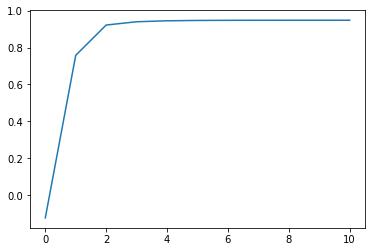

In [9]:
plt.plot(corr)

To extract more 2DCCA components, use twoDcca_mat:
##### p1: the number of left loading
##### p2 :the number of right loading

In [10]:
(loading, corr, error) = twoDcca_mat(X, Y, p1=2, p2=1, x_regular=1e-4, y_regular=1e-4, iter_max=10)

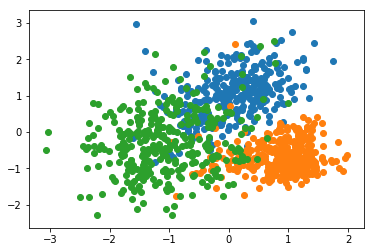

In [11]:
X_tf = towDcca_transform(X, *(loading[:2]))
plt.scatter(X_tf[(train.iloc[:,0].values==0),0], X_tf[(train.iloc[:,0].values==0),1])
plt.scatter(X_tf[(train.iloc[:,0].values==1),0], X_tf[(train.iloc[:,0].values==1),1])
plt.scatter(X_tf[(train.iloc[:,0].values==2),0], X_tf[(train.iloc[:,0].values==2),1])

For the deflation procedure, which we only implement the code for 2 loadings and inexact updating, use twoDcca_iter

In [16]:
loading1, loading2, residual, error = twoDcca_iter(X, Y, M=10, m=10, eta=0.0001, x_regular=.01, y_regular=.01, iter_max=10)

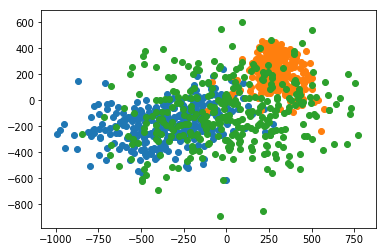

In [17]:
X_tf1 = towDcca_transform(X, *(loading1[:2])).flatten()
X_tf2 = towDcca_transform(X, *(loading2[:2])).flatten()
plt.scatter(X_tf1[(train.iloc[:,0].values==0)], X_tf2[(train.iloc[:,0].values==0)])
plt.scatter(X_tf1[(train.iloc[:,0].values==1)], X_tf2[(train.iloc[:,0].values==1)])
plt.scatter(X_tf1[(train.iloc[:,0].values==2)], X_tf2[(train.iloc[:,0].values==2)])

Comparing the result with 2DPCA, 2DCCA improves seperation via label information:

In [14]:
loading = twoDpca(X, 2, 1, 1e-4, 5)

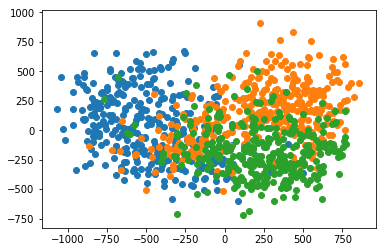

In [15]:
X_tf = towDcca_transform(X, *(loading[:2]))
plt.scatter(X_tf[(train.iloc[:,0].values==0),0], X_tf[(train.iloc[:,0].values==0),1])
plt.scatter(X_tf[(train.iloc[:,0].values==1),0], X_tf[(train.iloc[:,0].values==1),1])
plt.scatter(X_tf[(train.iloc[:,0].values==2),0], X_tf[(train.iloc[:,0].values==2),1])